# Simulation MAB algorithm(via Thomson Sampling)

## Setting
+ 당첨 확률이 다른 $A$,$B$,$C$ 3개의 후보
+ 초기 분포 $Beta(2,2)$

## Initialize
+ 분포 parameter ($\alpha=2$, $\beta=2$)
+ 당첨확률 trueP=$[0.3,0.4,0.5]$

## Process
+ $step 1.$ 각각의 분포에서 난수를 생성
+ $step 2.$ 뽑힌 난수에서 최대값을 찾음
+ $step 3.$ 최대값이 추출된 분포에 맵핑되는 후보를 실험
+ $step 4.$ 결과(실패or성공)에 따라 해당 분포의 모수 업데이트
+ $step 5.$ $step1$~$4.$ 을 수렴할때까지 충분히 반복

## Simulate

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#initialize for A,B,C distribution 
n=3
#trueP=list(np.random.uniform(0,1,n))
trueP=[0.3,0.4,0.5]
current_parameterMat=np.ones((n,2))+1
print("Parameters :")
print(current_parameterMat)

print("trueP :")
print(trueP)

Parameters :
[[2. 2.]
 [2. 2.]
 [2. 2.]]
trueP :
[0.3, 0.4, 0.5]


### UDF
+ plot_dist()
 + 모수에 따른 각각의 분포 그려주는 함수 
+ ploting() 
 + A,B,C 에 분포를 동시에 그려주는 함수
+ draw_argmax() 
 + 각각의 분포에서 난수를 추출하여 가장큰 값이 분포를 찾아줌
+ throwing_coin() 
 + 실험&결과
+ add_parameters() 
 + 업데이트할 모수를 계산

In [2]:
def plot_dist(parameterMat,i) :
    parameter=parameterMat[i]
    mean = round(parameter[0]/(parameter[0]+parameter[1]),1)
    xx = np.linspace(0, 1, 100)
    rv = sp.stats.beta(parameter[0],parameter[1])
    pdf = rv.pdf(xx)
    plt.plot(xx, pdf)
    plt.title(str(i)+"th pdf of $Beta$("+str(int(parameter[0]))+","+str(int(parameter[1]))+"), "+"mean="+str(mean))
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$") 
#####################################################################################################################
def ploting():
    plt.figure(figsize=(18,6))
    plt.subplot(131);plot_dist(current_parameterMat,0);
    plt.subplot(132);plot_dist(current_parameterMat,1);
    plt.subplot(133);plot_dist(current_parameterMat,2);
    plt.show()
#####################################################################################################################
def draw_argmax(parameterMat):
    rn=[]
    for i in range(0,len(parameterMat)):
        parameter=parameterMat[i]
        rn.append(list(np.random.beta(a=parameter[0], b=parameter[1], size=1))[0])
    return(rn.index(max(rn)))
#####################################################################################################################
def throwing_coin(trueP,idx):
    return(int(np.random.binomial(1,trueP[idx],size=1)))
#####################################################################################################################
def add_parameters(result):
    if(result==1):
        alpha=1
        beta=0
    else :
        alpha=0
        beta=1
    return([alpha,beta])

### Example

Initial distribution of A,B,C


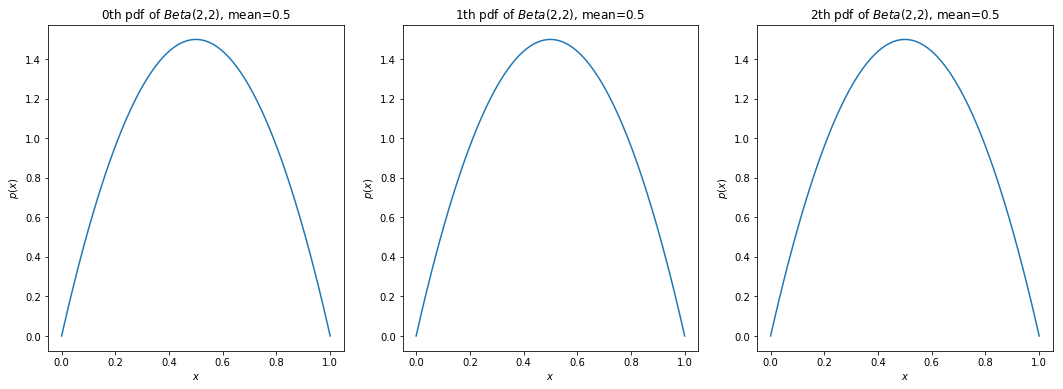

In [3]:
print("Initial distribution of A,B,C")
ploting()

+ $step 1.$ 각각의 분포에서 난수를 생성

In [4]:
rn=[]
for i in range(0,len(current_parameterMat)):
    parameter=current_parameterMat[i]
    rn.append(list(np.random.beta(a=parameter[0], b=parameter[1], size=1))[0])
print("List of random numbers from each distribution : ",rn)

List of random numbers from each distribution :  [0.7316370333451679, 0.6761323956826812, 0.931017556178612]


+ $step 2.$ 뽑힌 난수에서 최대값을 찾음

In [11]:
print("Index & value of maximum : ",max(rn),', ',rn.index(max(rn)))

impression_index = draw_argmax(current_parameterMat)
print("impression_index : "+str(impression_index))

Index & value of maximum :  0.931017556178612 ,  2
impression_index : 2


+ $step 3.$ 최대값이 추출된 분포에 맵핑되는 후보를 실험

In [12]:
testP=trueP[impression_index]
testCoinResult=int(np.random.binomial(1,testP,size=1))

print("testP : "+ str(testP))
print("testCoinResult : "+ str(testCoinResult))

coin_result = throwing_coin(trueP,impression_index)
print("coin_result : "+str(coin_result))

testP : 0.5
testCoinResult : 0
coin_result : 0


+ $step 4.$ 결과(실패or성공)에 따라 해당 분포의 모수 업데이트

In [13]:
if(coin_result==1):
    alpha=1
    beta=0
else :
    alpha=0
    beta=1
testAddParameter = [alpha,beta]
print("testAddParameter : "+str(testAddParameter))

AddParameter=add_parameters(coin_result)

testAddParameter : [0, 1]


impression_index : 2
current_parameterMat : 
[[2. 2.]
 [2. 2.]
 [2. 2.]]
update_parameterMat : 
[[2. 2.]
 [2. 2.]
 [2. 3.]]
Initial distribution of A,B,C


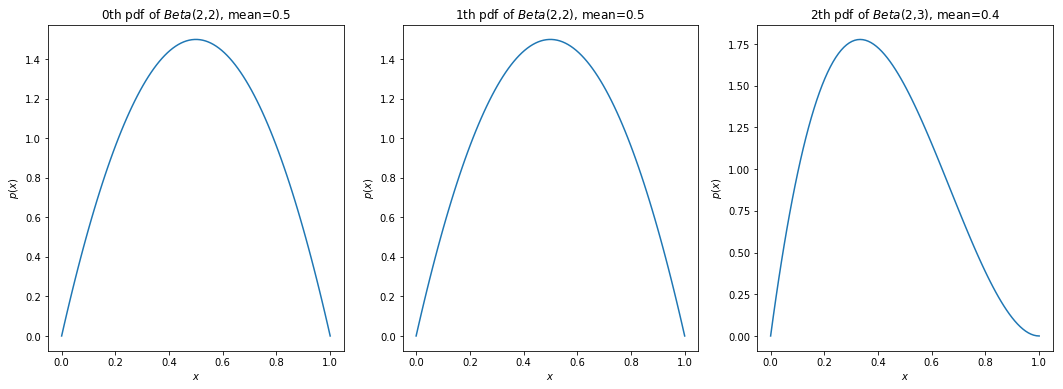

In [14]:
print("impression_index : "+str(impression_index))
print("current_parameterMat : ")
print(current_parameterMat)

update_parameterMat=current_parameterMat
update_parameterMat[impression_index]=update_parameterMat[impression_index]+AddParameter
current_parameterMat=update_parameterMat

print("update_parameterMat : ")
print(current_parameterMat)

print("Update distribution of A,B,C")
ploting()

+ $step 5.$ $step1$~$4.$ 을 수렴할때까지 충분히 반복

Parameters :
[[2. 2.]
 [2. 2.]
 [2. 2.]]
trueP :
[0.3, 0.33, 0.35]


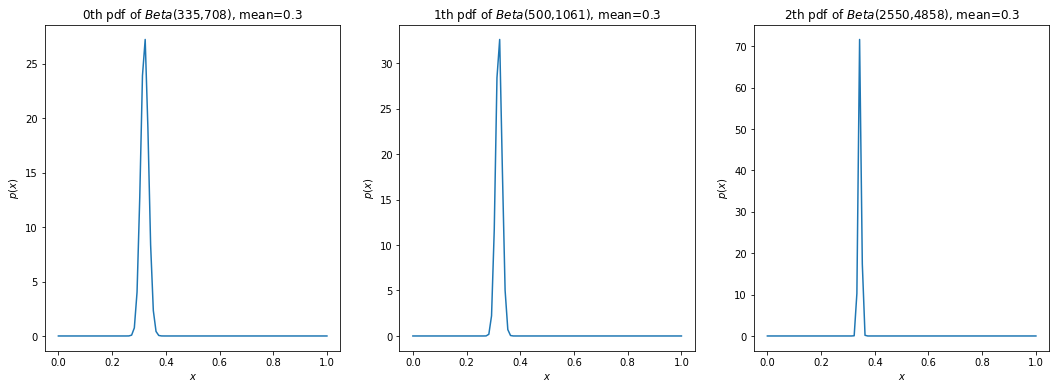

In [17]:
#initialize for A,B,C distribution 
n=3
#trueP=list(np.random.uniform(0,1,n))
trueP=[0.3,0.33,0.35]
current_parameterMat=np.ones((n,2))+1
print("Parameters :")
print(current_parameterMat)

print("trueP :")
print(trueP)

impression_index_list=[]
for rep in range(1,10001):
    impression_index = draw_argmax(current_parameterMat)
    coin_result = throwing_coin(trueP,impression_index)
    impression_index_list.append(impression_index)
    #print(impression_index)
    #if(int(rep%5)==0):
    #    ploting()
    update_parameterMat=current_parameterMat
    AddParameter=add_parameters(coin_result)
    update_parameterMat[impression_index]=update_parameterMat[impression_index]+AddParameter
    current_parameterMat=update_parameterMat
ploting()

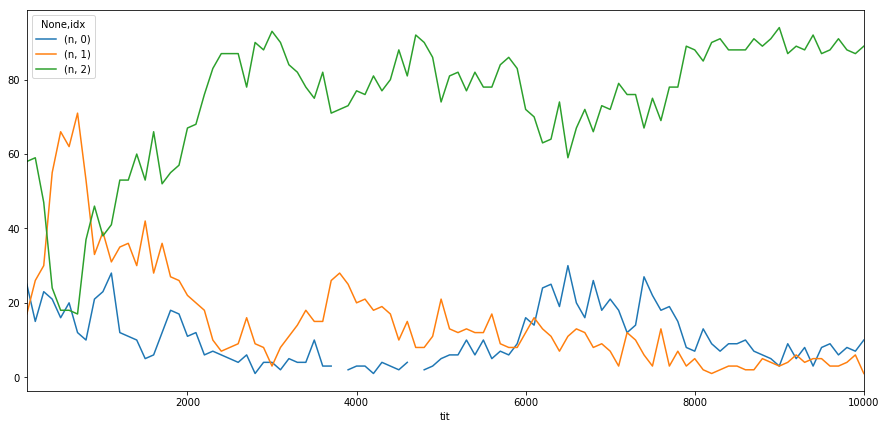

In [18]:
a=list(np.linspace(100, 10000, 100))
b=[1]*100
gen = [x*y for x in a for y in b]
tmp = impression_index_list
data=DataFrame({'idx':tmp,'tit':gen,'n':tmp})
plot_data = pd.crosstab(data.tit,data.idx)

fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['tit','idx']).count().unstack().plot(ax=ax)
plt.show()